# Support Vector Machines (SVM)

Máquinas de vectores de soporte es un algoritmo con el objetivo de encontrar un hiperplano en un espacio $n-$dimensional.

La dimensión de dicho hiperplano es $n-1$.

In [1]:
# Se cargan las librerías que se van a utilizar
import math
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import mlxtend
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import warnings

from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

In [2]:
# Se carga la base de datos
df = pd.read_csv('cancer.csv') #Se encuentra en la misma carpeta que el jupyter notebook
print(df.shape) #Se tienen 569 renglones y 32 columnas

(569, 32)


In [3]:
## 2) ANÁLISIS EXPLORATORIO
# Se realiza una descripción analítica de los datos.
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Los datos corresponden a 569 personas con diagnóstico de cáncer de mama.

Para cada una de ellas se tienen 30 mediciones de su respectivo tumor.

Las 30 mediciones se clasifican en 10 atributos:

   - _Radio (radius):_ Promedio de los radios del tumor.
   - _Textura (texture):_ Desviación estándar de valores en una escala de grises.
   - _Perímetro (perimeter):_ Perímetro del tumor (p).
   - _Área (area):_ Área del tumor (a).
   - _Suavidad (smoothness):_ Variaciones locales en las medidas del radio del tumor.
   - _Compactibilidad (compactness):_ $\dfrac{p^{2}}{a} - 1$
   - _Concavidad (concavity):_ Gravedad de las porciones cóncavas del contorno del tumor.
   - _Puntos cóncavos (concave points):_ Número de porciones cóncavas en el contorno del tumor.
   - _Simetría (symmetry):_ Simetría del tumor.
   - _Dimensión fractal (fractal dimension):_ Aproximación de la línea de costa menos uno $(coastline - 1)$. La línea de costa [(coastline)](https://sketchplanations.com/the-coastline-paradox) es una medida de la dimensión fractal de una costa real. Se aplica en este caso al borde del tumor.
   
Los atributos mencionados tienen las siguientes medidas:
   - Promedio (mean)
   - Desviación estándar (se)
   - Promedio de los 3 valores más grandes o peores (worst)
   
Las columnas de la base de datos son:

   1. **id:** Número de identificación del paciente.
   2. **diagnosis:** M -> si el tumor es maligno,  B -> si el tumor es benigno.
   3. **radius_mean**
   4. **texture_mean**
   5. **perimeter_mean**
   6. **area_mean**
   7. **smoothness_mean**
   8. **compactness_mean**
   9. **concavity_mean**
   10. **concave_points_mean**
   11. **symmetry_mean**
   12. **fractal_dimension_mean**
   13. **radius_se**
   14. **texture_se**
   15. **perimeter_se**
   16. **area_se**
   17. **smoothness_se**
   18. **compactness_se**
   19. **concavity_se**
   20. **concave_points_se**
   21. **symmetry_se**
   22. **fractal_dimension_se**
   23. **radius_worst**
   24. **texture_worst**
   25. **perimeter_worst**
   26. **area_worst**
   27. **smoothness_worst**
   28. **compactness_worst**
   29. **concavity_worst**
   30. **concave_points_worst**
   31. **symmetry_worst**
   32. **fractal_dimension_worst**
   
   
<!---
https://www.kaggle.com/sarahvch/breast-cancer-wisconsin-prognostic-data-set

https://www.kaggle.com/siriasadeddin/breast-cancer-prognosis-98-pecision-98-recall
-->
   
   

In [4]:
# Se cuenta el número de NaN's por columna
df.isnull().sum() #No hay columnas con NaN

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
# Tomemos las columnas referentes al perímetro del tumor para hacer un pequeño análisis.
feature_names = ['perimeter_mean', 'perimeter_se', 'perimeter_worst']
perimeter = df[feature_names]
perimeter.describe()

,perimeter_mean,perimeter_se,perimeter_worst
count,569.000000,569.000000,569.000000
mean,91.969033,2.866059,107.261213
std,24.298981,2.021855,33.602542
min,43.790000,0.757000,50.410000
25%,75.170000,1.606000,84.110000
50%,86.240000,2.287000,97.660000
75%,104.100000,3.357000,125.400000
max,188.500000,21.980000,251.200000


El promedio de la columna _mean perimeter_ es $91.96$ unidades de medida (u.m.), (mm,cm,in,...).

En promedio, el tumor más grande mide $188.5 u.m.$ y el más pequeño mide $43.79 u.m.$

El promedio de la columna _perimeter error_ es $2.86 u.m.$

De los tumores más grandes el rango está entre $50.41 u.m.$ y $251.2 u.m.$

In [6]:
# Se imprime el número de diagnósticos con tumores benignos y malignos:
print(df.groupby('diagnosis').size())

diagnosis
B    357
M    212
dtype: int64


In [7]:
# Se definen las varibles X (predictoras) y Y (dependiente)
Y = df['diagnosis']
X = df.drop(['id','diagnosis'],axis=1)# Se eliminan las columnas 'id' y 'diagnosis'
print(type(X))
X.head()

<class 'pandas.core.frame.DataFrame'>


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


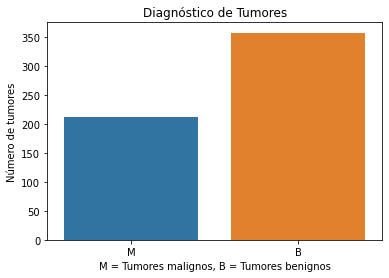


Hay  357  personas con tumores benignos
 y  212 personas con tumores malignos.


In [8]:
## 3) VISUALIZACIÓN DE LOS DATOS

# Gráfica de barras de los pacientes
sns.countplot(x='diagnosis', data=df)
plt.title('Diagnóstico de Tumores')
plt.xlabel('M = Tumores malignos, B = Tumores benignos')
plt.ylabel('Número de tumores')
plt.show()

print('\nHay ',df.groupby('diagnosis').size()[0],' personas con tumores benignos\n y ',
      df.groupby('diagnosis').size()[1],'personas con tumores malignos.')

Mínimo =  6.981
Máximo =  28.11


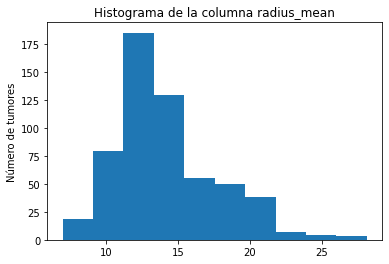

Mínimo =  9.71
Máximo =  39.28


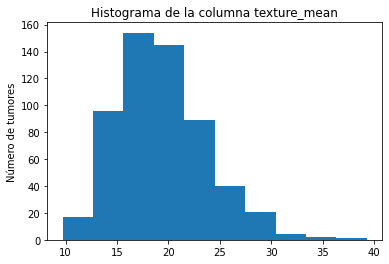

Mínimo =  43.79
Máximo =  188.5


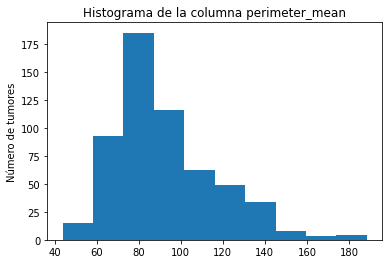

Mínimo =  143.5
Máximo =  2501.0


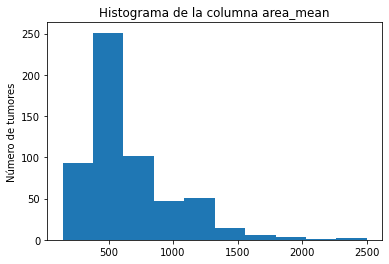

Mínimo =  0.052629999999999996
Máximo =  0.1634


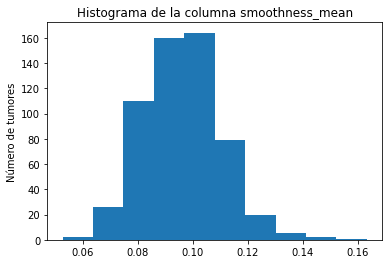

Mínimo =  0.01938
Máximo =  0.3454


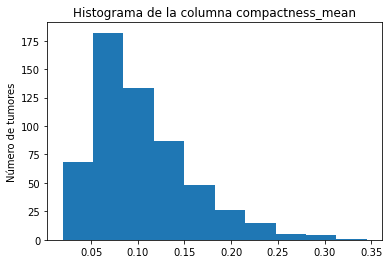

Mínimo =  0.0
Máximo =  0.4268


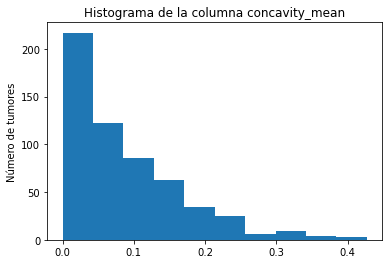

Mínimo =  0.0
Máximo =  0.2012


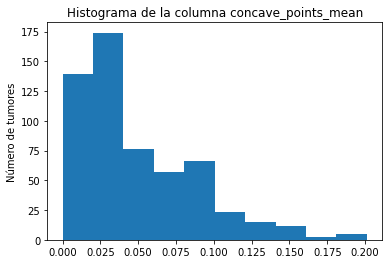

Mínimo =  0.106
Máximo =  0.304


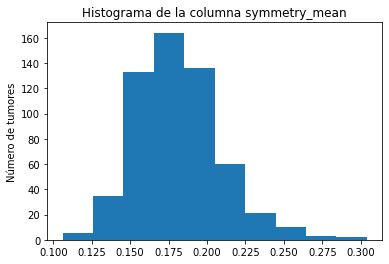

Mínimo =  0.049960000000000004
Máximo =  0.09744


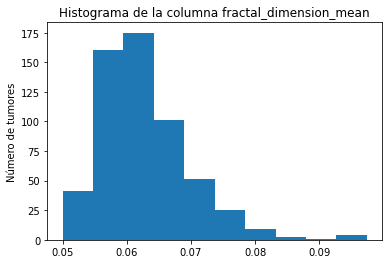

Mínimo =  0.1115
Máximo =  2.873


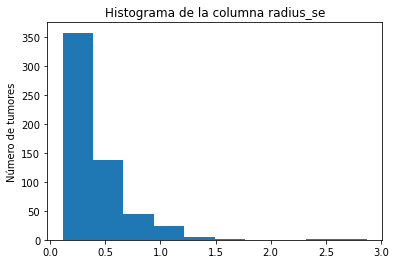

Mínimo =  0.3602
Máximo =  4.885


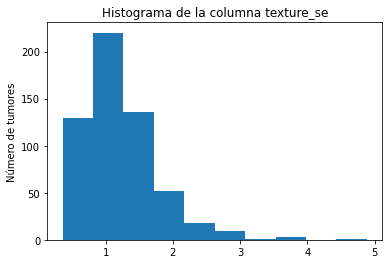

Mínimo =  0.757
Máximo =  21.98


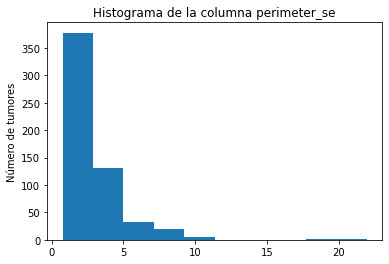

Mínimo =  6.8020000000000005
Máximo =  542.2


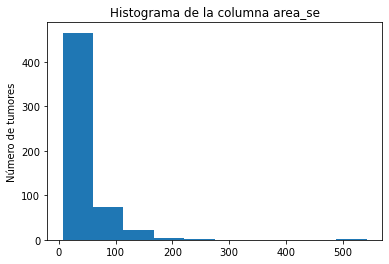

Mínimo =  0.001713
Máximo =  0.03113


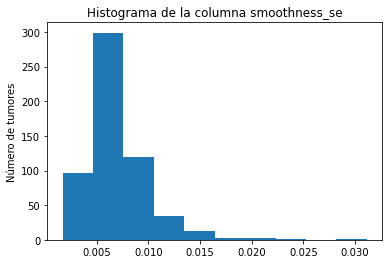

Mínimo =  0.002252
Máximo =  0.1354


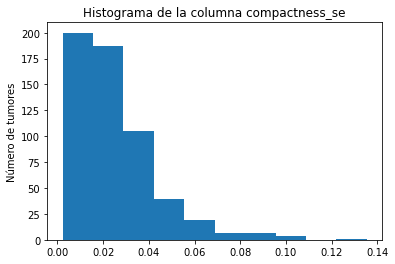

Mínimo =  0.0
Máximo =  0.396


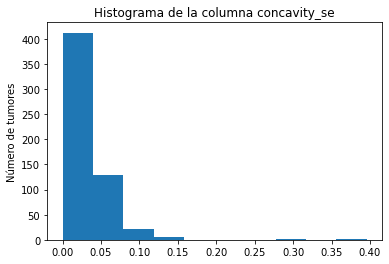

Mínimo =  0.0
Máximo =  0.05279


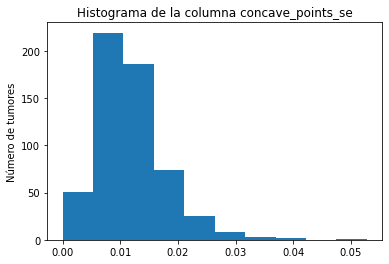

Mínimo =  0.007882
Máximo =  0.07895


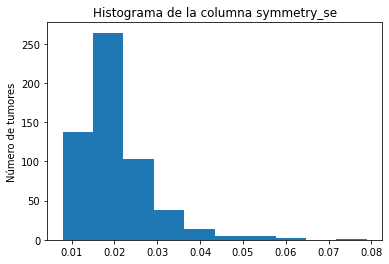

Mínimo =  0.0008948000000000001
Máximo =  0.02984


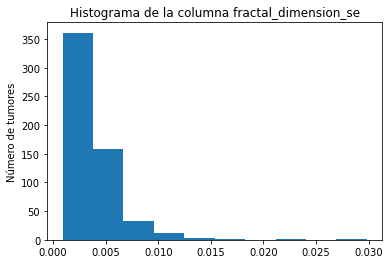

Mínimo =  7.93
Máximo =  36.04


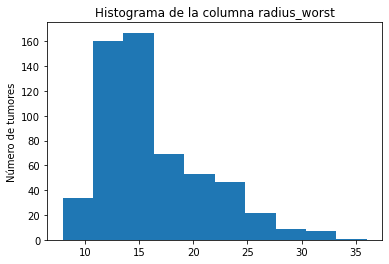

Mínimo =  12.02
Máximo =  49.54


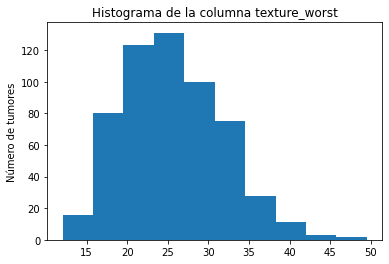

Mínimo =  50.41
Máximo =  251.2


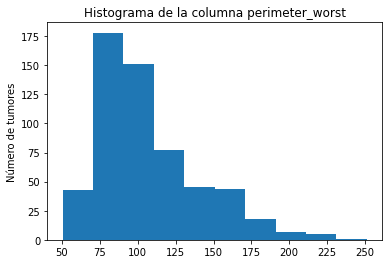

Mínimo =  185.2
Máximo =  4254.0


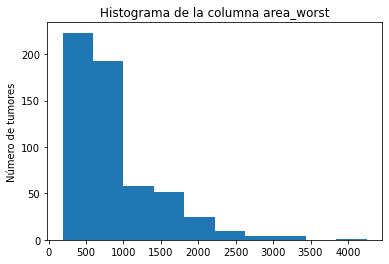

Mínimo =  0.07117000000000001
Máximo =  0.2226


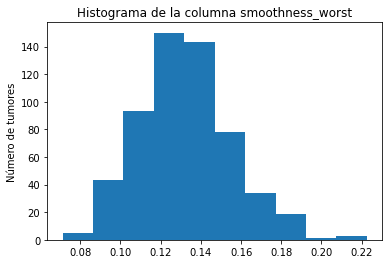

Mínimo =  0.02729
Máximo =  1.058


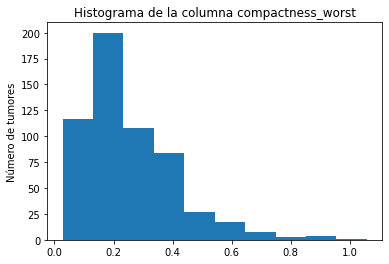

Mínimo =  0.0
Máximo =  1.252


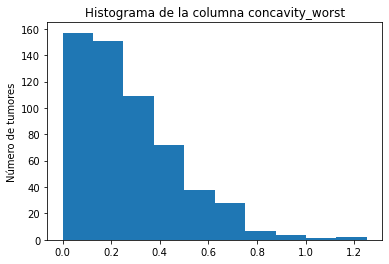

Mínimo =  0.0
Máximo =  0.29100000000000004


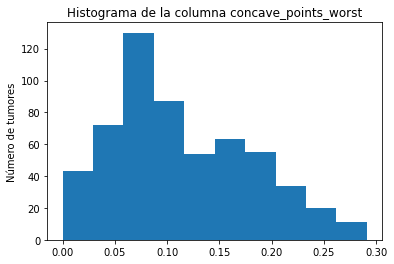

Mínimo =  0.1565
Máximo =  0.6638


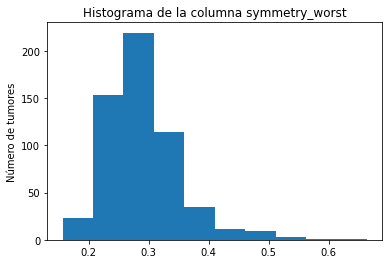

Mínimo =  0.05504
Máximo =  0.2075


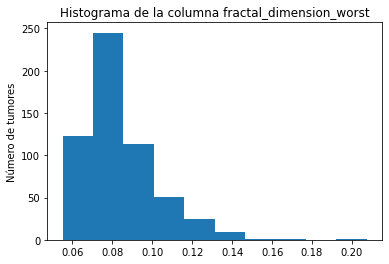

In [9]:
#Histogramas de cada columna
for i in range(0,X.shape[1]):
    print('Mínimo = ',min(X.iloc[:,i]))
    print('Máximo = ',max(X.iloc[:,i]))
    plt.hist(X.iloc[:,i])
    plt.title('Histograma de la columna ' + X.columns[i])
    #plt.xlabel(descrip[i])
    plt.ylabel('Número de tumores')
    plt.show()

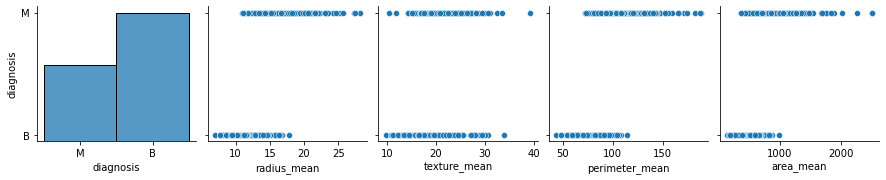

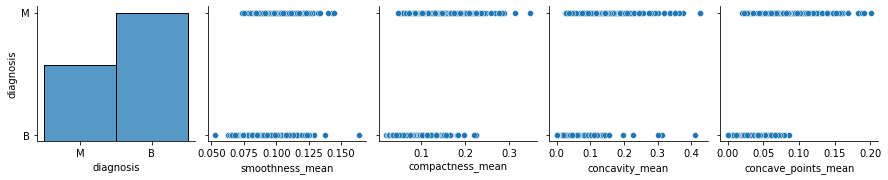

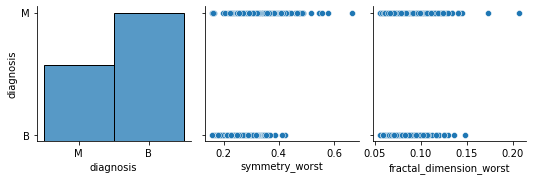

In [10]:
#Se muestra la correlación entre el diagnóstico y algunas variables predictivas
for i in [0,4]:
    sns.pairplot(data=df,
                  y_vars=['diagnosis'],
                  x_vars=['diagnosis',X.columns[i], X.columns[i+1], X.columns[i+2],X.columns[i+3]])
    plt.show()
    
sns.pairplot(data=df,y_vars=['diagnosis'],x_vars=['diagnosis',X.columns[28], X.columns[29]])
plt.show()

En cada una de las gráficas anteriores podemos ver la gráfica para un modelo de regresión logística por lo que es otro modelo que se puede aplicar a esta base de datos.

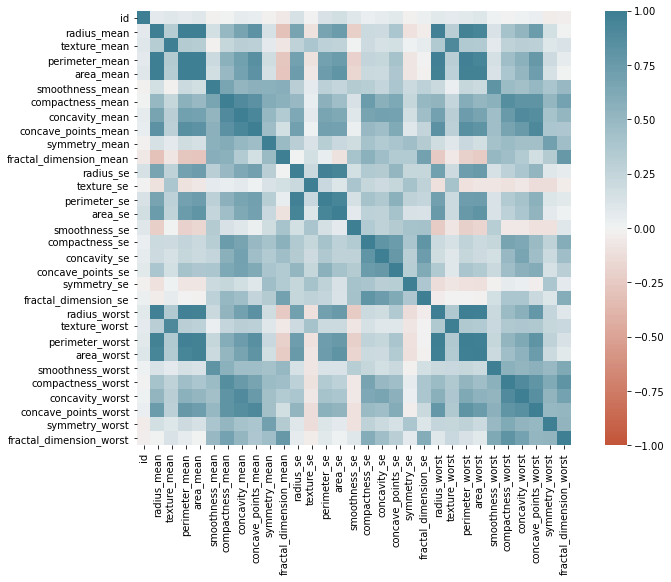

In [11]:
# Matriz de correlación
corr = df.corr()
#corr
plt.figure(figsize=(12,8))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)

<AxesSubplot:>

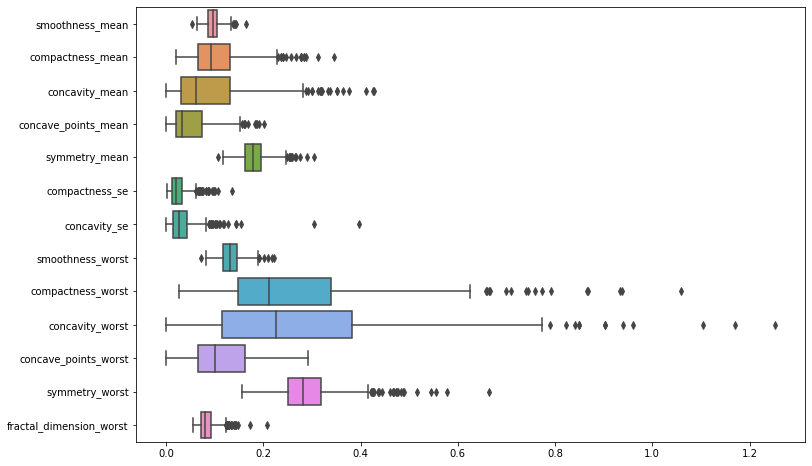

In [12]:
X2 = X.drop(['area_mean','area_worst','perimeter_mean','area_se','perimeter_worst','radius_mean','texture_mean',
             'radius_worst','texture_worst','radius_se','texture_se','perimeter_se',
             'smoothness_se','concave_points_se','symmetry_se','fractal_dimension_se','fractal_dimension_mean'],axis=1)
plt.figure(figsize=(12,8))
sns.boxplot(orient="h",data=X2)

<AxesSubplot:>

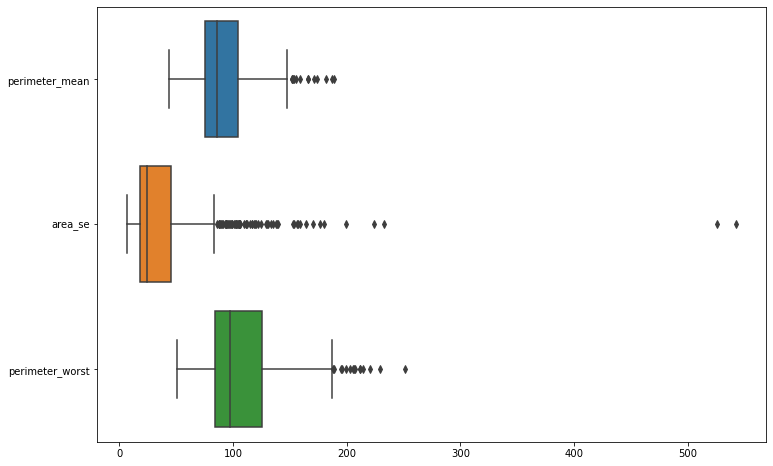

In [13]:
X3 = X[['perimeter_mean','area_se','perimeter_worst']]
plt.figure(figsize=(12,8))
sns.boxplot(orient="h",data=X3)

<AxesSubplot:>

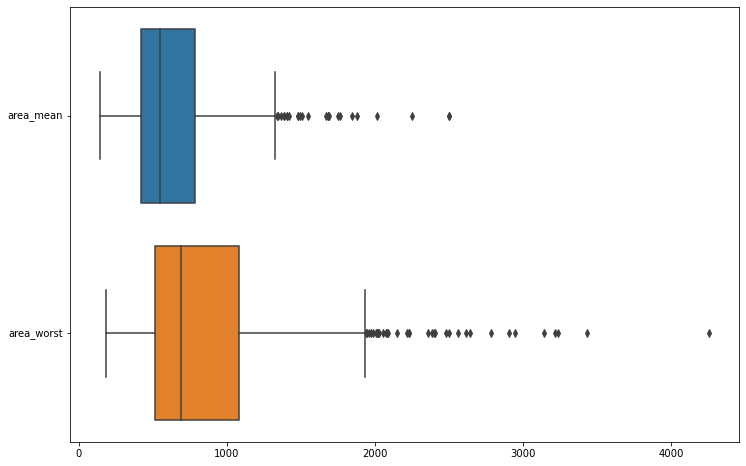

In [14]:
X4 = X[['area_mean','area_worst']]
plt.figure(figsize=(12,8))
sns.boxplot(orient="h",data=X4)

<AxesSubplot:>

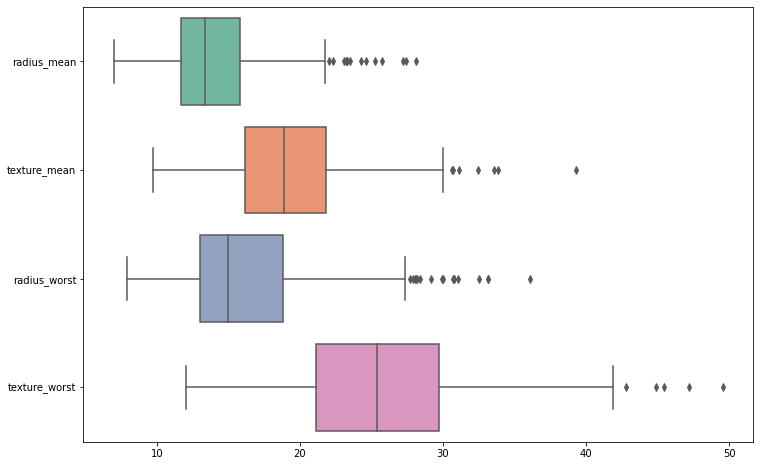

In [15]:
X5 = X[['radius_mean','texture_mean','radius_worst','texture_worst']]
plt.figure(figsize=(12,8))
sns.boxplot( palette="Set2", orient="h",data=X5)

<AxesSubplot:>

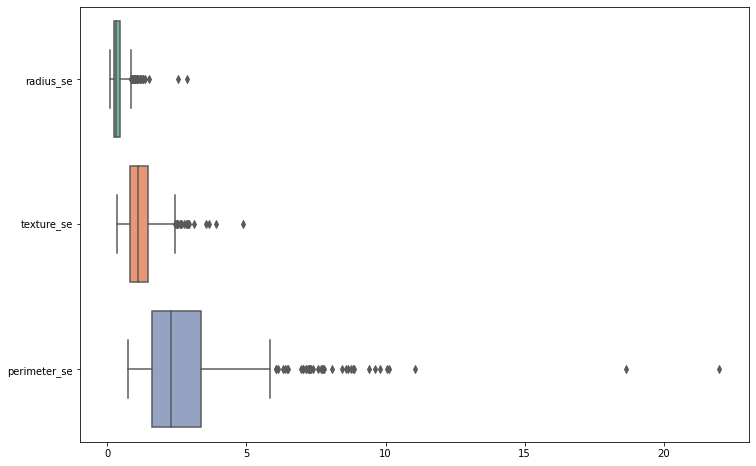

In [16]:
X6 = X[['radius_se','texture_se','perimeter_se']]
plt.figure(figsize=(12,8))
sns.boxplot( palette="Set2", orient="h",data=X6)

<AxesSubplot:>

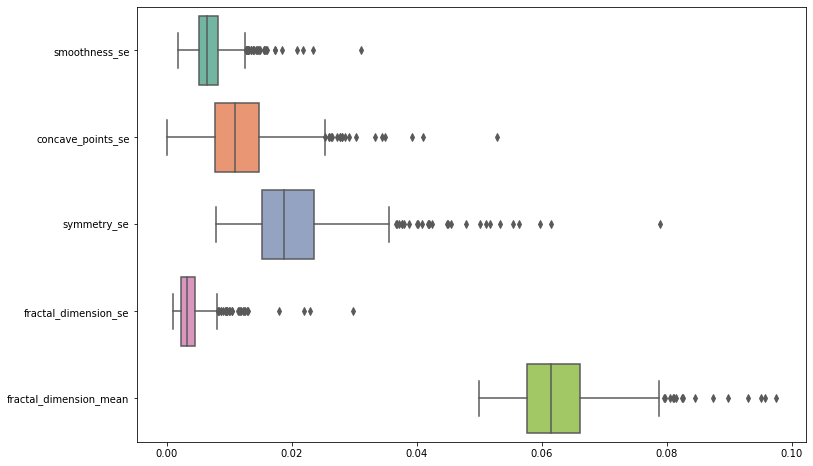

In [17]:
X7 = X[['smoothness_se','concave_points_se','symmetry_se','fractal_dimension_se','fractal_dimension_mean']]
plt.figure(figsize=(12,8))
sns.boxplot( palette="Set2", orient="h",data=X7)

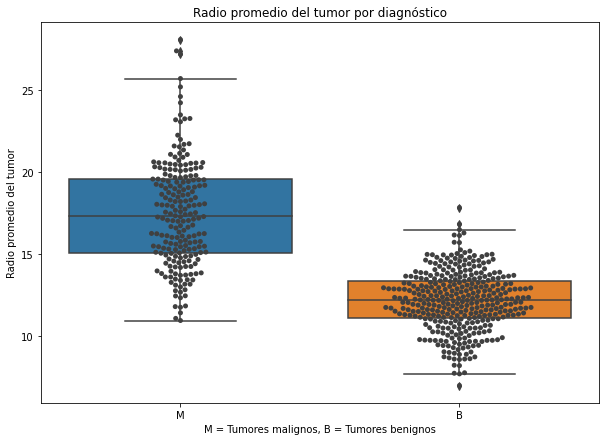

In [18]:
# Radio promedio del tumor por diagnóstico
plt.figure(figsize=(10,7)) #Se ajusta el tamaño de la figura
sns.boxplot(x='diagnosis',y='radius_mean',data=df)
sns.swarmplot(x="diagnosis", y="radius_mean", data=df, color=".25")
plt.title('Radio promedio del tumor por diagnóstico')
plt.xlabel('M = Tumores malignos, B = Tumores benignos')
plt.ylabel('Radio promedio del tumor')
plt.show()

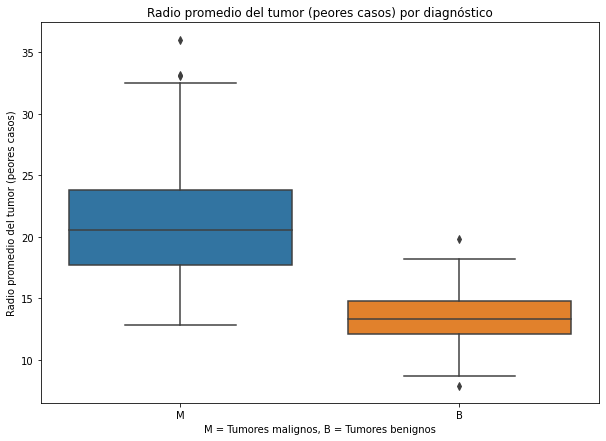

In [19]:
# Radio promedio del tumor (peores casos) por diagnóstico
plt.figure(figsize=(10,7)) #Se ajusta el tamaño de la figura
sns.boxplot(x='diagnosis',y='radius_worst',data=df)
plt.title('Radio promedio del tumor (peores casos) por diagnóstico')
plt.xlabel('M = Tumores malignos, B = Tumores benignos')
plt.ylabel('Radio promedio del tumor (peores casos)')
plt.show()

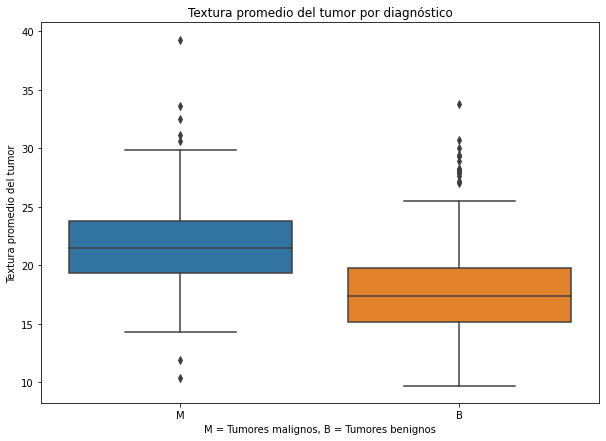

In [20]:
# Textura promedio del tumor por diagnóstico
plt.figure(figsize=(10,7)) #Se ajusta el tamaño de la figura
sns.boxplot(x='diagnosis',y='texture_mean',data=df)
plt.title('Textura promedio del tumor por diagnóstico')
plt.xlabel('M = Tumores malignos, B = Tumores benignos')
plt.ylabel('Textura promedio del tumor')
plt.show()

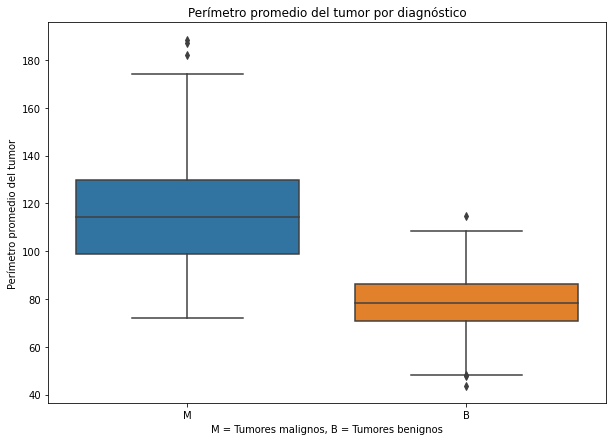

In [21]:
# Perímetro promedio del tumor por diagnóstico
plt.figure(figsize=(10,7)) #Se ajusta el tamaño de la figura
sns.boxplot(x='diagnosis',y='perimeter_mean',data=df)
plt.title('Perímetro promedio del tumor por diagnóstico')
plt.xlabel('M = Tumores malignos, B = Tumores benignos')
plt.ylabel('Perímetro promedio del tumor')
plt.show()

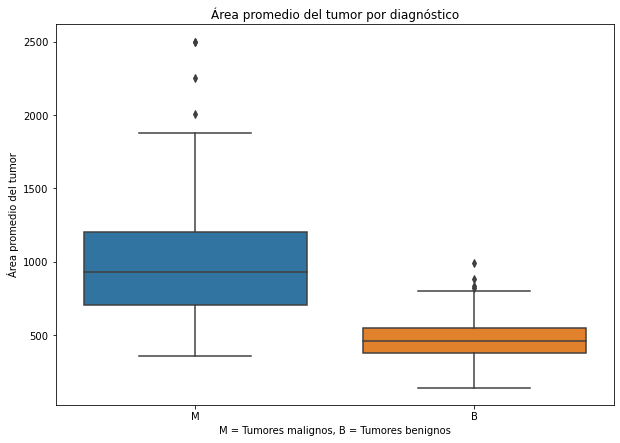

In [22]:
# Área promedio del tumor por diagnóstico
plt.figure(figsize=(10,7)) #Se ajusta el tamaño de la figura
sns.boxplot(x='diagnosis',y='area_mean',data=df)
plt.title('Área promedio del tumor por diagnóstico')
plt.xlabel('M = Tumores malignos, B = Tumores benignos')
plt.ylabel('Área promedio del tumor')
plt.show()

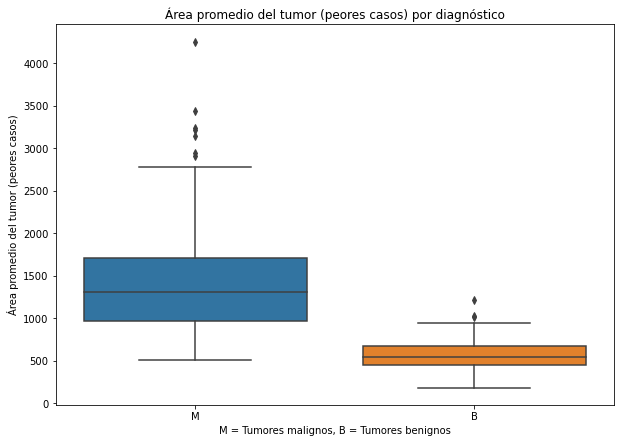

In [23]:
# Área promedio del tumor (peores casos) por diagnóstico
plt.figure(figsize=(10,7)) #Se ajusta el tamaño de la figura
sns.boxplot(x='diagnosis',y='area_worst',data=df)
plt.title('Área promedio del tumor (peores casos) por diagnóstico')
plt.xlabel('M = Tumores malignos, B = Tumores benignos')
plt.ylabel('Área promedio del tumor (peores casos)')
plt.show()

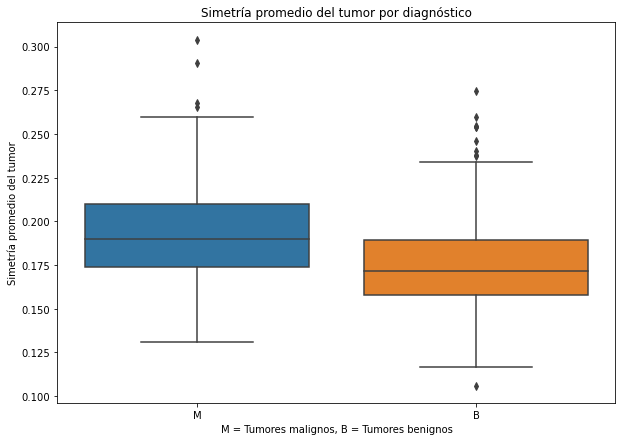

In [24]:
# Simetría promedio del tumor por diagnóstico
plt.figure(figsize=(10,7)) #Se ajusta el tamaño de la figura
sns.boxplot(x='diagnosis',y='symmetry_mean',data=df)
plt.title('Simetría promedio del tumor por diagnóstico')
plt.xlabel('M = Tumores malignos, B = Tumores benignos')
plt.ylabel('Simetría promedio del tumor')
plt.show()

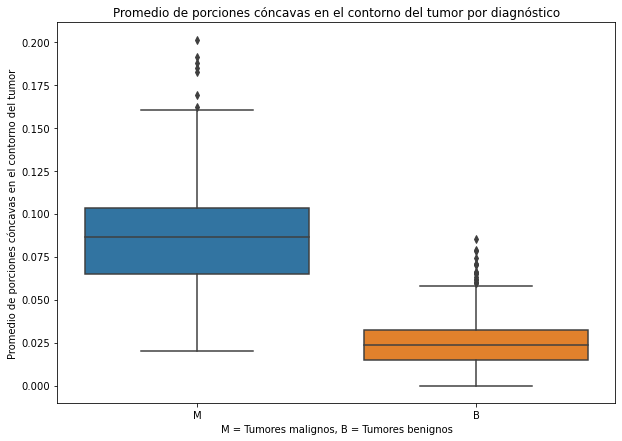

In [25]:
# Promedio de porciones cóncavas en el contorno del tumor por diagnóstico
plt.figure(figsize=(10,7)) #Se ajusta el tamaño de la figura
sns.boxplot(x='diagnosis',y='concave_points_mean',data=df)
plt.title('Promedio de porciones cóncavas en el contorno del tumor por diagnóstico')
plt.xlabel('M = Tumores malignos, B = Tumores benignos')
plt.ylabel('Promedio de porciones cóncavas en el contorno del tumor')
plt.show()

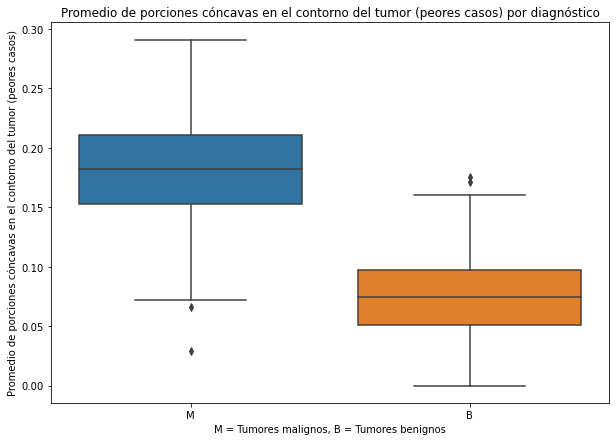

In [26]:
# Promedio de porciones cóncavas en el contorno del tumor (peores casos) por diagnóstico
plt.figure(figsize=(10,7)) #Se ajusta el tamaño de la figura
sns.boxplot(x='diagnosis',y='concave_points_worst',data=df)
plt.title('Promedio de porciones cóncavas en el contorno del tumor (peores casos) por diagnóstico')
plt.xlabel('M = Tumores malignos, B = Tumores benignos')
plt.ylabel('Promedio de porciones cóncavas en el contorno del tumor (peores casos)')
plt.show()

[Medidas de forma](https://centrogeo.repositorioinstitucional.mx/jspui/bitstream/1012/161/1/17-Recordando%20las%20Medidas%20de%20Tendencia%20Central%2C%20de%20Dispersi%C3%B3n%20y%20de%20la%20Forma%20-%20%20Diplomado%20en%20An%C3%A1lisis%20de%20Informaci%C3%B3n%20Geoespacial.pdf)

[Sesgo](https://dle.rae.es/sesgo)

In [27]:
## 4) DIVIDIR LOS DATOS
# Se separan los datos en 2 grupos (usualmente 80% y 20%):
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.3,random_state = 109)

### Kernel lineal

In [28]:
## 5) CONSTRUIR UN MODELO
# En este ejemplo vamos a elegir el modelo SVM
SVMmodel = svm.SVC(kernel='linear') # Kernel lineal
SVMmodel.fit(X_train,Y_train)

SVC(kernel='linear')

In [29]:
## 6) PREDICCIONES
# Se hacen las predicciones con "X_test"
Y_pred = SVMmodel.predict(X_test)

In [30]:
## 7) EVALUACIÓN DEL MODELO
print('Score = ',round(SVMmodel.score(X_train, Y_train) * 100, 2),
      '% = Tasa de respuestas correctas del modelo en el conjunto de entrenamiento')
print('Accuracy = ',round(metrics.accuracy_score(Y_test, Y_pred) * 100, 2),
      '% = Tasa de respuestas correctas del modelo en el conjunto de prueba')

Score =  96.23 % = Tasa de respuestas correctas del modelo en el conjunto de entrenamiento
Accuracy =  96.49 % = Tasa de respuestas correctas del modelo en el conjunto de prueba


Text(0, 0.5, 'Número de tumores')

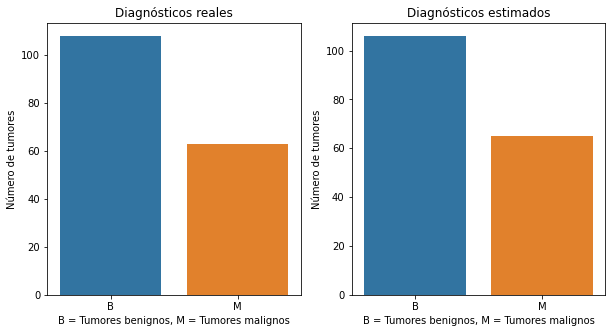

In [31]:
# Se grafican los resultados de la predicción junto con los valores reales
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)    
sns.countplot(x=Y_test, data=df)
plt.title('Diagnósticos reales')
plt.xlabel('B = Tumores benignos, M = Tumores malignos')
plt.ylabel('Número de tumores')

plt.subplot(1,2,2)    
sns.countplot(x=Y_pred, data=df)
plt.title('Diagnósticos estimados')
plt.xlabel('B = Tumores benignos, M = Tumores malignos')
plt.ylabel('Número de tumores')

In [32]:
#Matriz de Confusión
print(confusion_matrix(Y_test, Y_pred))

[[104   4]
 [  2  61]]


   - **TP:** Positivos Verdaderos
   - **FP:** Falsos Positivos (Error tipo I)
   - **FN:** Falsos Negativos ( Error tipo II)
   - **TN:** Negativos Verdaderos


|           |    |                             Valores |               Reales               |
|-----------|----|------------------------------------:|:-----------------------------------|
|           |    |                  Si                 |                 No                 |
|    **Pre-**   | Si |      104      |  4 |
| **dicciones** | No |  2 |      61     |


### Kernel polinomial

In [33]:
polinomMod = svm.SVC(kernel='poly', degree=2) # Kernel polinomial
polinomMod.fit(X_train,Y_train)
Y_pred_poli = polinomMod.predict(X_test)

print('Accuracy = ',round(metrics.accuracy_score(Y_test, Y_pred_poli) * 100, 2),
      '% = Tasa de respuestas correctas del modelo en el conjunto de prueba')

Accuracy =  93.57 % = Tasa de respuestas correctas del modelo en el conjunto de prueba


Text(0, 0.5, 'Número de tumores')

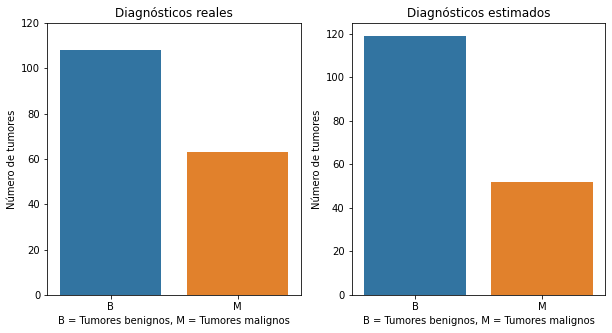

In [34]:
# Se grafican los resultados de la predicción junto con los valores reales
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)    
sns.countplot(x=Y_test, data=df)
plt.title('Diagnósticos reales')
plt.xlabel('B = Tumores benignos, M = Tumores malignos')
plt.ylabel('Número de tumores')
plt.ylim(0,120)

plt.subplot(1,2,2)    
sns.countplot(x=Y_pred_poli, data=df)
plt.title('Diagnósticos estimados')
plt.xlabel('B = Tumores benignos, M = Tumores malignos')
plt.ylabel('Número de tumores')

In [35]:
#Matriz de Confusión
print(confusion_matrix(Y_test, Y_pred_poli))

[[108   0]
 [ 11  52]]


- **TP:** Positivos Verdaderos
- **FP:** Falsos Positivos (Error tipo I)
- **FN:** Falsos Negativos ( Error tipo II)
- **TN:** Negativos Verdaderos

|           |    |                             Valores |               Reales               |
|-----------|----|------------------------------------:|:-----------------------------------|
|           |    |                  Si                 |                 No                 |
|    **Pre-**   | Si |      108      |  0 |
| **dicciones** | No |  11 |      52     |


### RBF Kernel (Radial Basis Function)

In [36]:
# Es un kernel muy utilizado ya que tiene un comportamiento similar a la distribución normal.
polinomGauss = svm.SVC(kernel='rbf') # RBF Kernel
polinomGauss.fit(X_train,Y_train)
Y_pred_Gauss = polinomGauss.predict(X_test)

print('Accuracy = ',round(metrics.accuracy_score(Y_test, Y_pred_Gauss) * 100, 2),
      '% = Tasa de respuestas correctas del modelo en el conjunto de prueba')

Accuracy =  92.4 % = Tasa de respuestas correctas del modelo en el conjunto de prueba


Text(0, 0.5, 'Número de tumores')

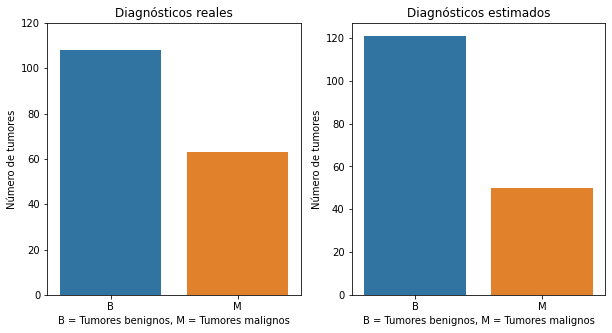

In [37]:
# Se grafican los resultados de la predicción junto con los valores reales
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)    
sns.countplot(x=Y_test, data=df)
plt.title('Diagnósticos reales')
plt.xlabel('B = Tumores benignos, M = Tumores malignos')
plt.ylabel('Número de tumores')
plt.ylim(0,120)

plt.subplot(1,2,2)    
sns.countplot(x=Y_pred_Gauss, data=df)
plt.title('Diagnósticos estimados')
plt.xlabel('B = Tumores benignos, M = Tumores malignos')
plt.ylabel('Número de tumores')

In [38]:
#Matriz de Confusión
print(confusion_matrix(Y_test, Y_pred_Gauss))

[[108   0]
 [ 13  50]]


- **TP:** Positivos Verdaderos
- **FP:** Falsos Positivos (Error tipo I)
- **FN:** Falsos Negativos ( Error tipo II)
- **TN:** Negativos Verdaderos

|           |    |                             Valores |               Reales               |
|-----------|----|------------------------------------:|:-----------------------------------|
|           |    |                  Si                 |                 No                 |
|    **Pre-**   | Si |      108      |  0 |
| **dicciones** | No |  13 |      50     |


### Sigmoid Kernel

In [39]:
polinomSigmoid = svm.SVC(kernel='sigmoid') # Kernel Sigmoide
polinomSigmoid.fit(X_train,Y_train)
Y_pred_Sigmoid = polinomSigmoid.predict(X_test)

print('Accuracy = ',round(metrics.accuracy_score(Y_test, Y_pred_Sigmoid) * 100, 2),
      '% = Tasa de respuestas correctas del modelo en el conjunto de prueba')

Accuracy =  39.77 % = Tasa de respuestas correctas del modelo en el conjunto de prueba


(0.0, 130.0)

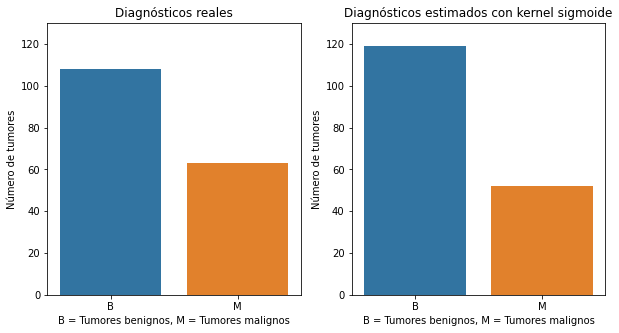

In [40]:
# Se grafican los resultados de la predicción con kernel sigmoide junto con los valores reales
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)    
sns.countplot(x=Y_test, data=df)
plt.title('Diagnósticos reales')
plt.xlabel('B = Tumores benignos, M = Tumores malignos')
plt.ylabel('Número de tumores')
plt.ylim(0,130)

plt.subplot(1,2,2)    
sns.countplot(x=Y_pred_Sigmoid, data=df)
plt.title('Diagnósticos estimados con kernel sigmoide')
plt.xlabel('B = Tumores benignos, M = Tumores malignos')
plt.ylabel('Número de tumores')
plt.ylim(0,130)

In [41]:
#Matriz de Confusión
print(confusion_matrix(Y_test, Y_pred_Sigmoid))

[[62 46]
 [57  6]]


   - **TP:** Positivos Verdaderos
   - **FP:** Falsos Positivos (Error tipo I)
   - **FN:** Falsos Negativos ( Error tipo II)
   - **TN:** Negativos Verdaderos


|           |    |                             Valores |               Reales               |
|-----------|----|------------------------------------:|:-----------------------------------|
|           |    |                  Si                 |                 No                 |
|    **Pre-**   | Si |      62      |  46 |
| **dicciones** | No |  57 |      6     |


# Conclusiones

El modelo tiene opción para elegir 4 diferentes tipos de _kernel_.

La tasa de respuestas correctas del modelo en el conjunto de prueba para cada uno es:

| Kernel     | Accuracy |
|------------|----------|
| Lineal     | 96.49%   |
| Polinomial | 93.57%   |
| Gaussiano  | 92.4%    |
| Sigmoide   | 39.77%   |


Por lo que el kernel lineal es el mejor para estos datos.
